In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

In [4]:
#Loading the Dataset

df = pd.read_csv("netflix_titles.csv")
print("Shape:", df.shape)
df.head()

Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#Data Cleaning

df.drop_duplicates(inplace = True)
print(df.isnull().sum())
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
#Duration Cleaning

df['duration'] = df['duration'].astype(str)
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['dyration_unit'] = df['duration'].str.extract('(min|Season|Seasons)')

In [7]:
#Helper Function

def split_explode(df, col):
    return df.assign(**{col: df[col].dropna().str.split(',')}).explode(col)

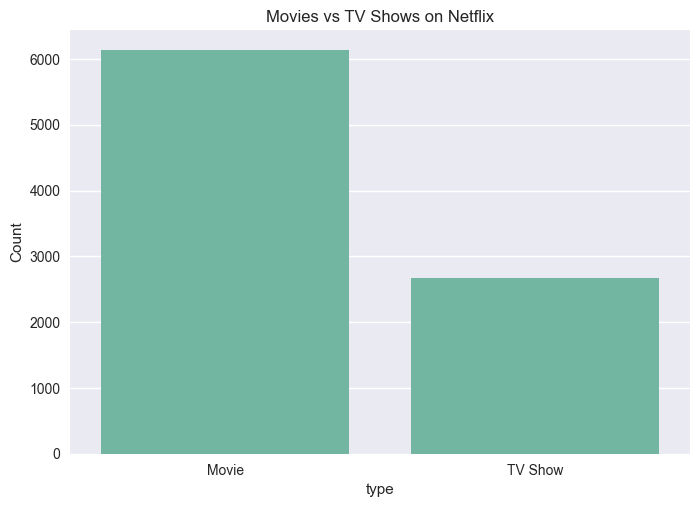

In [8]:
#Movies and TV shows

type_counts = df['type'].value_counts()
sns.barplot(x = type_counts.index, y = type_counts.values)
plt.title("Movies vs TV Shows on Netflix")
plt.ylabel("Count")
plt.show()

**Insights:**
- Movies make up the majority of Netflix's catalog, followed by TV Shows.
- However, the share of TV Shows has grown in recent years.
- Investing further in TV Shows could help boost binge-watching and user retention.

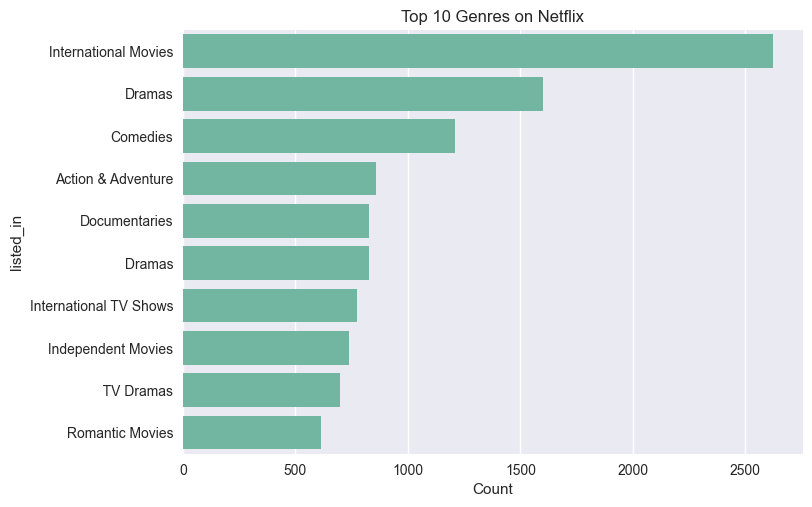

In [9]:
#Most Popular Genres Globally

genre_df = split_explode(df, 'listed_in')
top_genres = genre_df['listed_in'].value_counts().head(10)
sns.barplot(y = top_genres.index, x = top_genres.values)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.show()

**Insights:**
- Drama and Internationl Movies are the most common genres.
- Content variety in these genres could attract the widest audience.
- Expanding high-performing genres ensures strong global appeal.

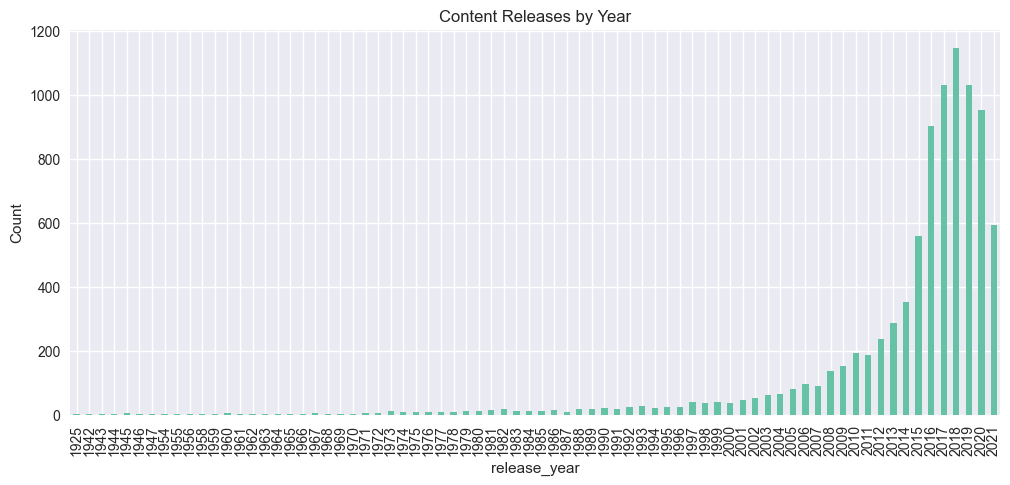

In [10]:
#Years with Highest Conent releases

year_counts = df['release_year'].value_counts().sort_index()
year_counts.plot(kind = 'bar', figsize = (12, 5))
plt.title("Content Releases by Year")
plt.ylabel("Count")
plt.show()

**Insights:**
- The peak of releases happened in the late 2010s.
- this correlates with Netflix's global expansion phase.
- Future release volumes should balance quality with quantity.

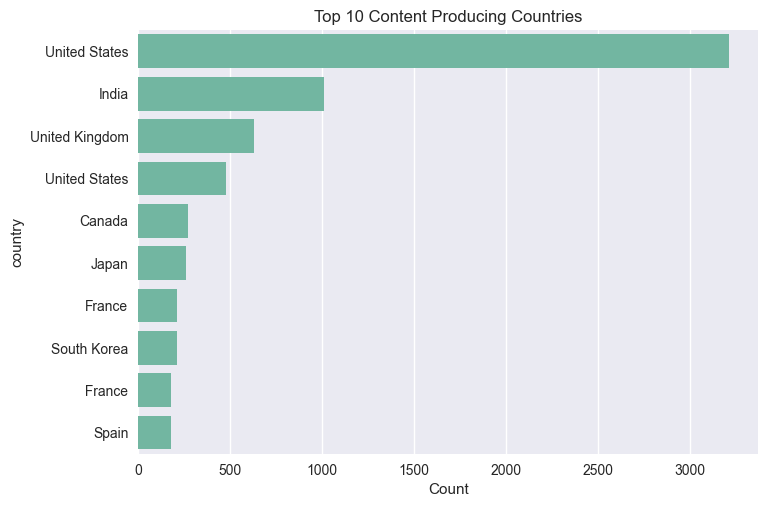

In [11]:
#Top Content-producing Countries

country_df = split_explode(df, 'country')
top_countries = country_df['country'].value_counts().head(10)
sns.barplot(y = top_countries.index, x = top_countries.values)
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Count")
plt.show()

**Insights:**
- The United States leads content production by a large margin.
- India and UK are also major contributors.
- Partnerships in emerging markets could increase diverse offerings.

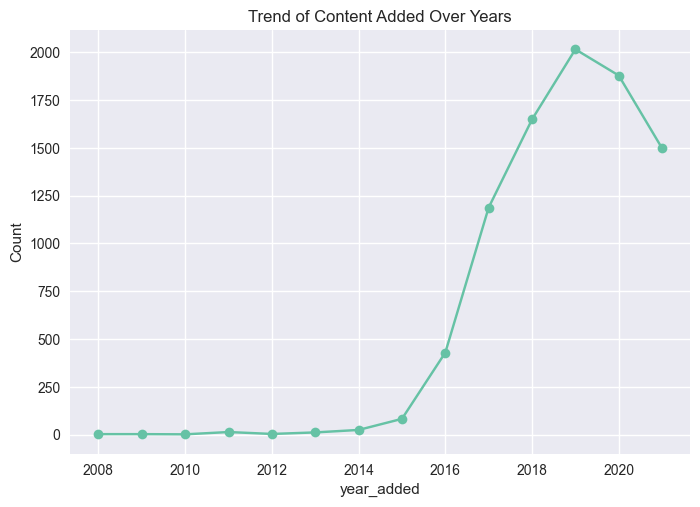

In [12]:
#Trend of Adding New Content Year by Year

year_added_counts = df['year_added'].value_counts().sort_index()
year_added_counts.plot(kind = 'line', marker = 'o')
plt.title("Trend of Content Added Over Years")
plt.ylabel("Count")
plt.show()

**Insights:**
- Content addition have steadily increased until recent years.
- Growth pace has slowed slightly, indicating a shift towards quality control.
- Stable additions maintain user engagement without oversaturation.

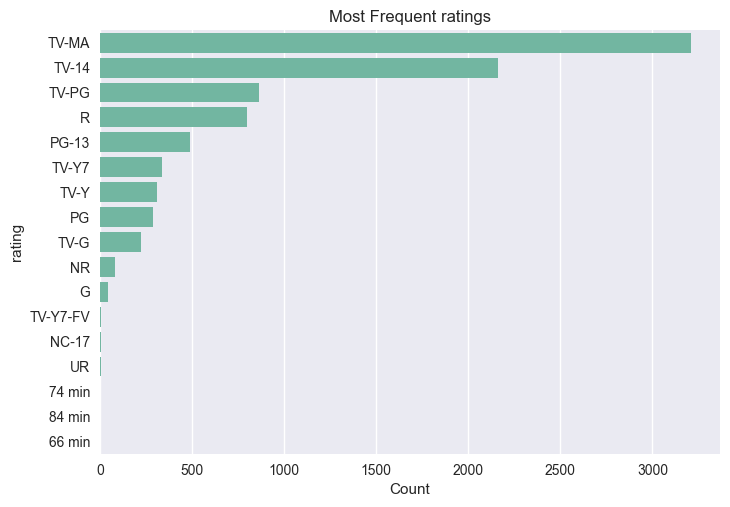

In [13]:
#Most Frequent Ratings

rating_counts = df['rating'].value_counts()
sns.barplot(y = rating_counts.index, x = rating_counts.values)
plt.title("Most Frequent ratings")
plt.xlabel("Count")
plt.show()

**Insights:**
- TV-MA is the most frequent rating, showing a focus on mature audiences.
- PG-13 and TV-14 are also significant, serving teen and family segments.
- Balancing mature and family-friendly content can broaden reach.

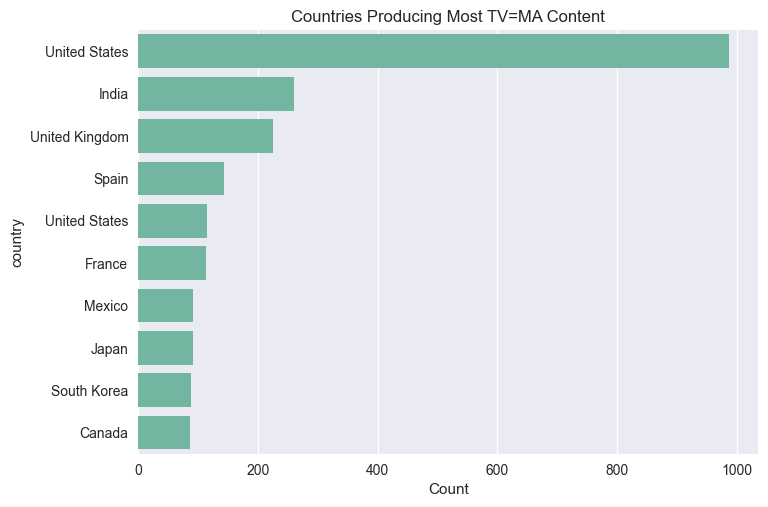

In [14]:
#Countries Producing More Mature Content (TV-MA)

tvma_df = country_df[country_df['rating'] == 'TV-MA']
top_tvma = tvma_df['country'].value_counts().head(10)
sns.barplot(y = top_tvma.index, x = top_tvma.values)
plt.title("Countries Producing Most TV=MA Content")
plt.xlabel("Count")
plt.show()

**Insights:**
- The U.S. dominates mature content production.
- India and the UK also contribute significantly.
- Targeting mature markets with tailored content could improve retention.

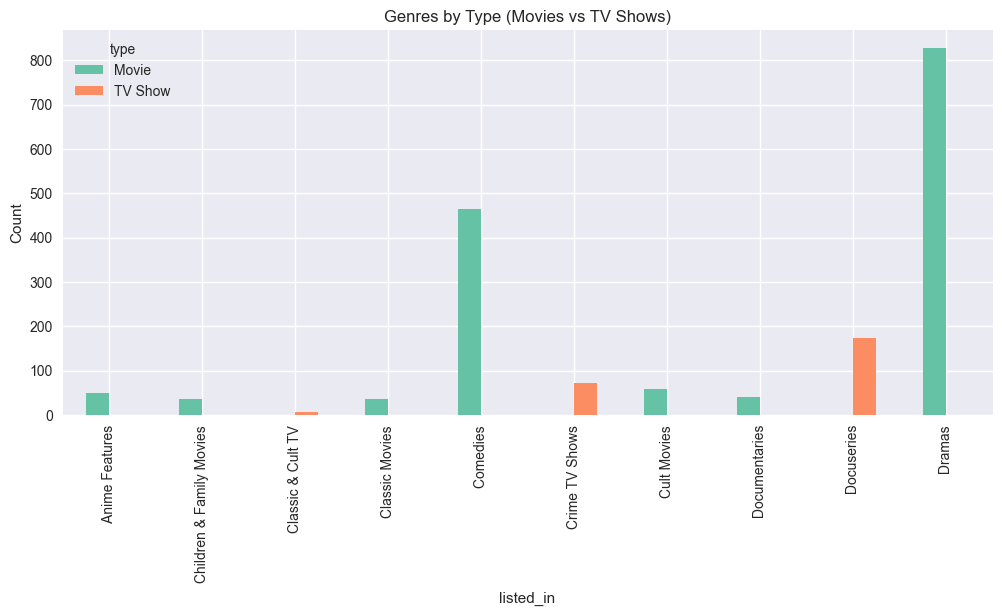

In [15]:
#Genres More Associated with TV Shows vs Movies

genre_type = genre_df.groupby(['listed_in', 'type']).size().unstack().fillna(0)
genre_type.head(10).plot(kind = 'bar', figsize = (12, 5))
plt.title("Genres by Type (Movies vs TV Shows)")
plt.ylabel("Count")
plt.show()

**Insights:**
- TV Shows lean towards Docuseries and Crime Shows.
- Movies are more focused on Drama, and Comedies.
- Genre-format alignment should guide acquisition and production strategy.

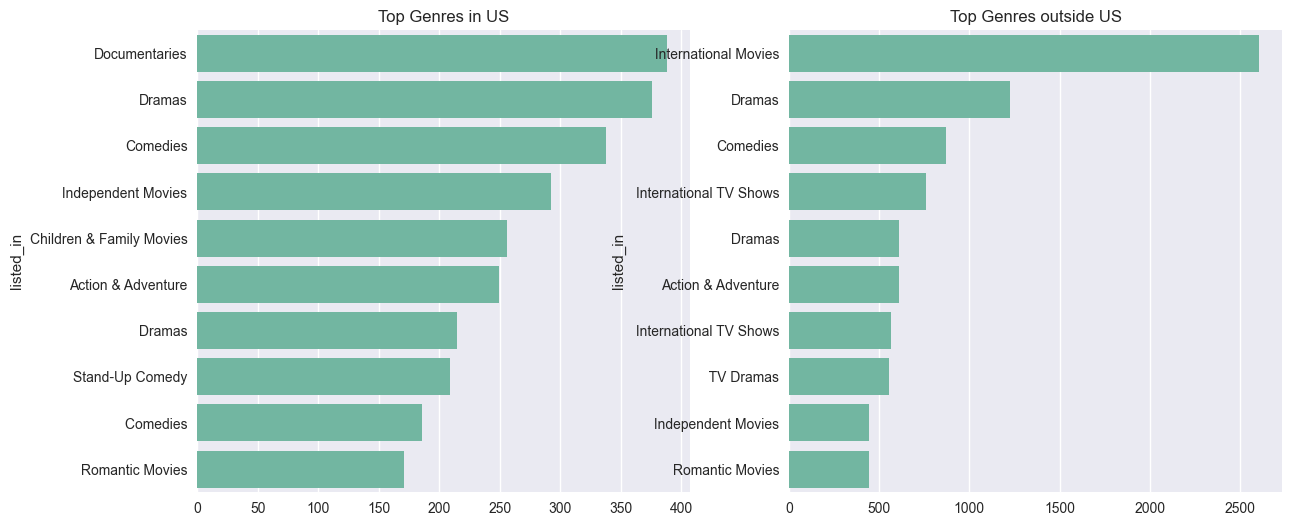

In [16]:
#Genres Dominationg U.S. vs Others

us_genres = genre_df[genre_df['country'] == 'United States']['listed_in'].value_counts().head(10)
nonus_genres = genre_df[genre_df['country'] != 'United States']['listed_in'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.barplot(y = us_genres.index, x = us_genres.values, ax = axes[0])
axes[0].set_title("Top Genres in US")

sns.barplot(y = nonus_genres.index, x = nonus_genres.values, ax = axes[1])
axes[1].set_title("Top Genres outside US")

plt.show()

**Insights:**
- U.S. content focuses on Dramas, Comedies, and Documentries.
- Non-U.S. content favors International Movies and Dramas.
- Geo-specific marketing could leverage these differences.

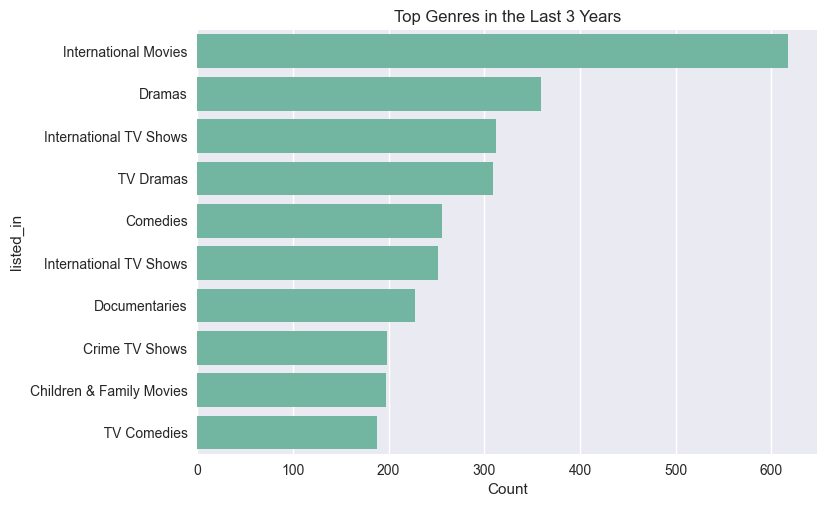

In [17]:
#Genres Most Popular in the Last 3 Years

recent_year = df['release_year'].max() -2
recent_genres = genre_df[genre_df['release_year'] >= recent_year]['listed_in'].value_counts().head(10)

sns.barplot(y = recent_genres.index, x = recent_genres.values)
plt.title("Top Genres in the Last 3 Years")
plt.xlabel("Count")
plt.show()

**Insights:**
- Recent years have seen a rise in International Movies, Dramas, and International TV Shows.
- Interest in Comedies has grown sharply.
- Staying responsive to emerging genre trends can maintain relevance.

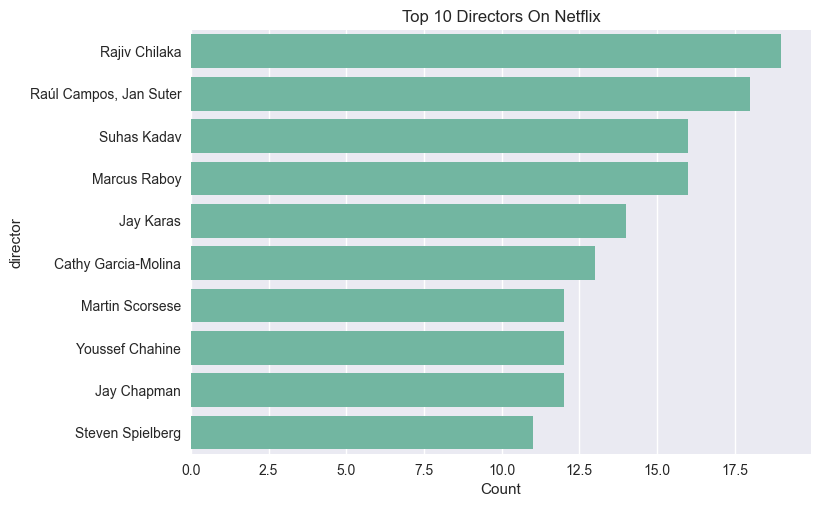

In [19]:
#Top 10 Directors With Most Content

top_directors = df['director'].value_counts().dropna().head(10)

sns.barplot(y = top_directors.index, x = top_directors.values)
plt.title("Top 10 Directors On Netflix")
plt.xlabel("Count")
plt.show()

**Insights:**
- Certain directors have a high volume of titles, indicating strong partnerships.
- Many are from the International cinema space, adding global diversity.
- Strengthening ties with these creators can ensure consistent output.

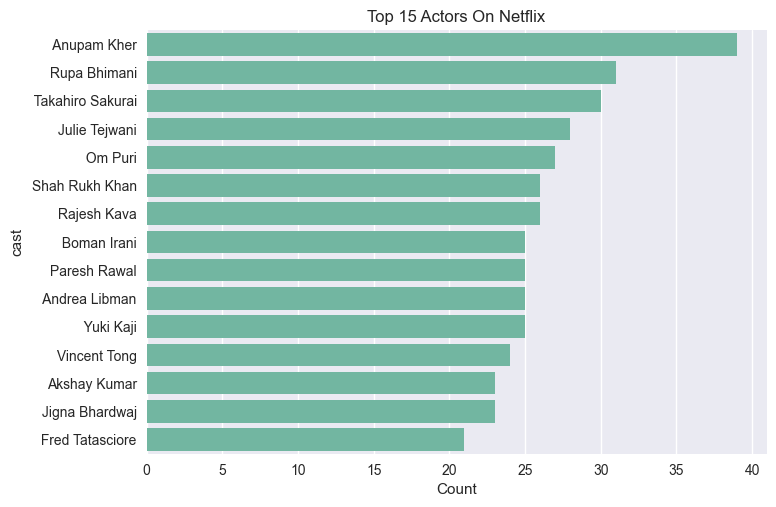

In [20]:
#Most Frequent Actors

actor_df = split_explode(df, 'cast')
top_actors = actor_df['cast'].value_counts().head(15)

sns.barplot(y = top_actors.index, x = top_actors.values)
plt.title("Top 15 Actors On Netflix")
plt.xlabel("Count")
plt.show()

**Insights:**
- Popular actors often appear in multiple high-profile titles.
- Familiar faces can help attract and retain subscribers.
- Casting popular actors in new projects can boost initial viewership.

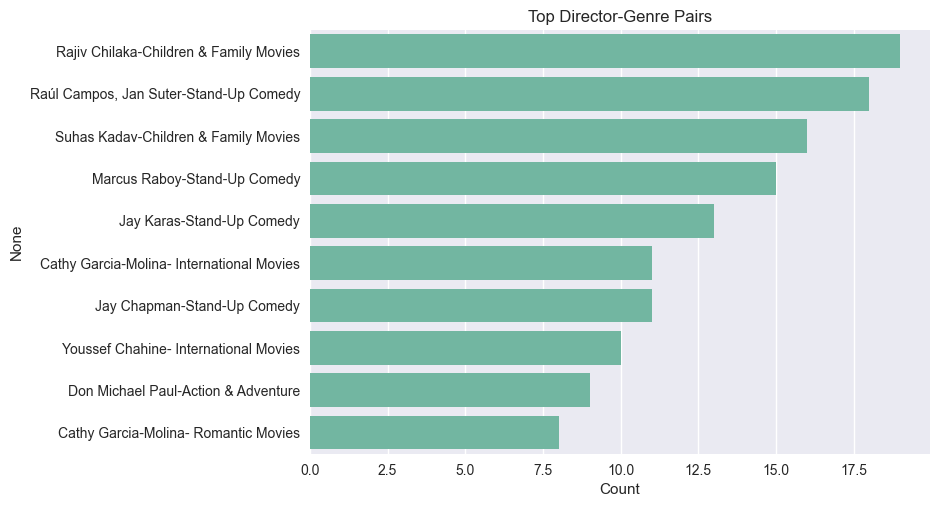

In [21]:
#Frequent Director-Genre Pairs

director_genre = genre_df.groupby(['director', 'listed_in']).size().reset_index(name = 'count')
top_pairs = director_genre.sort_values('count', ascending = False).head(10)

sns.barplot(y = top_pairs['director'] + "-" + top_pairs['listed_in'], x = top_pairs['count'])
plt.title("Top Director-Genre Pairs")
plt.xlabel("Count")
plt.show()

**Insights:**
- Some directors specialize in specific genres, indicating expertise.
- Matching them with similar genre projects can replicate past success.
- Experimenting with cross_genre projects may expand audience appeal.

In [22]:
#Titles with Unknown Directors or Cast

unknown_directors = df['director'].isna().sum()
unknown_cast = df['cast'].isna().sum()

print(f"Unknown Directors: {unknown_directors}")
print(f"Unknown Cast: {unknown_cast}")

Unknown Directors: 2634
Unknown Cast: 825


**Insights:**
- A significant portion lacks credited directors or cast.
- This could reduce discoverability in searches and recommendations.
- Improving metadata completeness can enhance user experience.

In [23]:
#Average Duration of Movies

avg_movie_duration = df[df['type'] == 'Movie']['duration_num'].mean()
print("Average Movie Duration:", avg_movie_duration)

Average Movie Duration: 99.57718668407311


**Insights:**
- Average Netflix movie length aligns with typical cinema releases (~90-110 mins).
- Longer formats are less common but cater to niche audiences.
- Maintaining optimal length improves completion rates.

In [24]:
#Most Common Number of TV Seasons

tv_season_mode = df[df['type'] == 'TV Show']['duration_num'].mode()[0]
print("Most Common TV Seasons:", tv_season_mode)

Most Common TV Seasons: 1.0


**Insight:**
- Most TV Shows have 1-2 seasons.
- Shorter runs may reflect Netflix's strategy of limited series.
- Extending successful series could increasse long-term engagement.

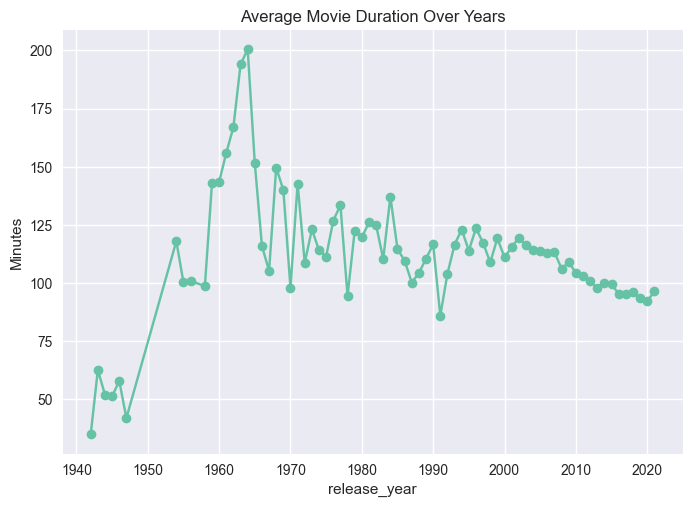

In [25]:
#Trend in Movie Durations Over the Years

movie_durations = df[df['type'] == 'Movie'].groupby('release_year')['duration_num'].mean()
movie_durations.plot(kind = 'line', marker = 'o')
plt.title("Average Movie Duration Over Years")
plt.ylabel("Minutes")
plt.show()

**Insights:**
- Movie lengths have remained fairly stable with minor fluctuations.
- Slight declines in recent years could reflect shifting attention spans.
- Testing shorter content formats may attract casual viewers.

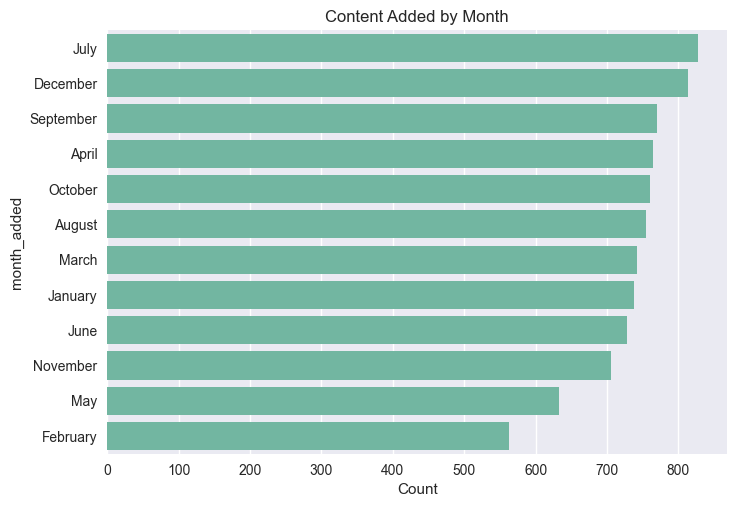

In [26]:
#Months with the Most Content Added

month_counts = df['month_added'].value_counts()

sns.barplot(y = month_counts.index, x = month_counts.values)
plt.title("Content Added by Month")
plt.xlabel("Count")
plt.show()

**Insights:**
- July, December, and September see the most additions.
- Aligns with holiday seasons and award eligibility timelines.
- Seasonal peaks should be used for high-profile releases.

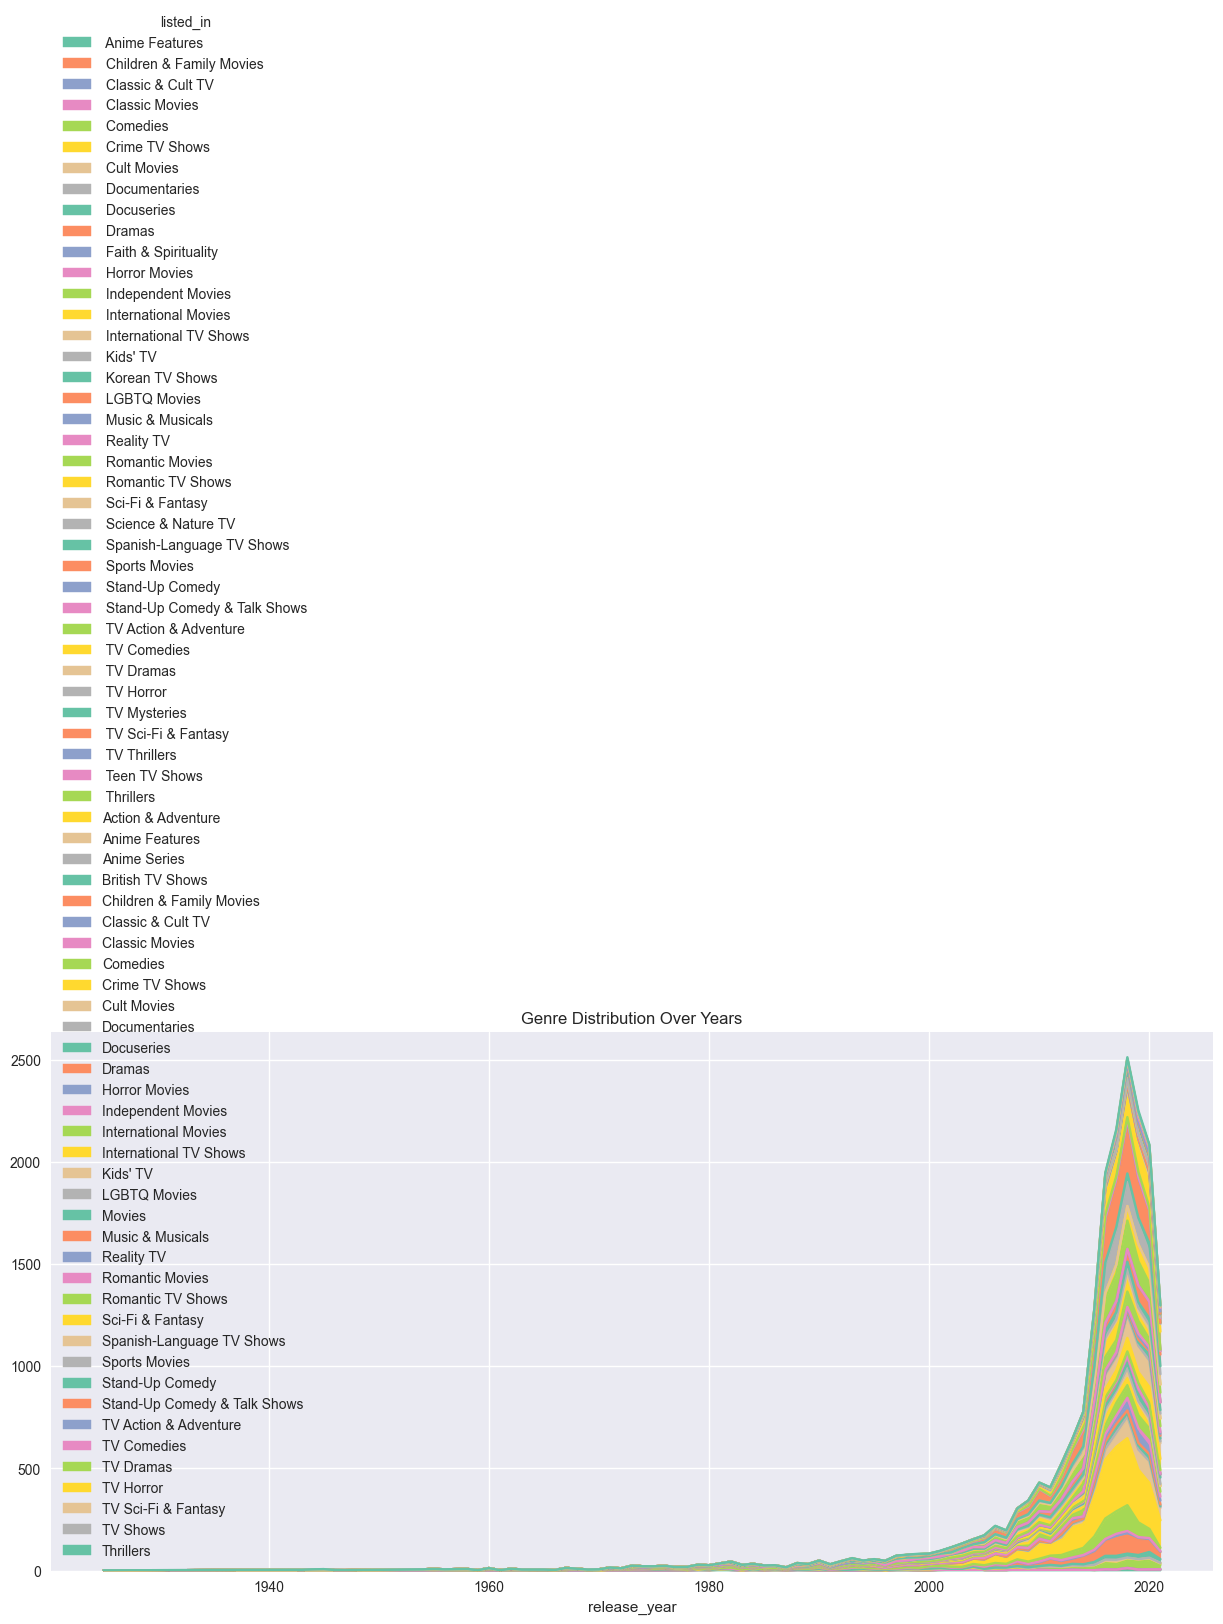

In [29]:
#Genre Distribution Across Years

genre_year = genre_df.groupby(['release_year', 'listed_in']).size().reset_index(name = 'count')
pivot_genre_year = genre_year.pivot(index = 'release_year', columns = 'listed_in', values = 'count').fillna(0)

pivot_genre_year.plot(kind = 'area', stacked = True, figsize = (15, 7))
plt.title("Genre Distribution Over Years")
plt.show()

**Insights:**
- Drama remains consistent across years.
- Documentaries and Stand-Up Comedy have grown in share.
- Tracking genre shifts can inform future content investment.

In [30]:
#Countries Producing the Most in Each Genre

country_genre = genre_df.groupby(['listed_in', 'country']).size().reset_index(name = 'count')
top_country_per_genre = country_genre.sort_values(['listed_in', 'count'], ascending = [True, False]).groupby('listed_in').head(1)
print(top_country_per_genre)

                      listed_in         country  count
1                Anime Features           Japan     39
11     Children & Family Movies   United States     16
13            Classic & Cult TV  United Kingdom      6
22               Classic Movies   United States     21
95                     Comedies   United States    186
...                         ...             ...    ...
3249                  TV Dramas   United States     50
3254                  TV Horror   United States      9
3256        TV Sci-Fi & Fantasy          Canada      1
3260                   TV Shows   United States      4
3271                  Thrillers   United States     43

[73 rows x 3 columns]


**Insights:**
- The U.S. leads most genres, but countries like Japan, South Korea, and India dominates certain categories.
- Regional strengths should guide international co-productions.
- Licensing local hits from strong genre markets can broaden appeal.